## Day 30 Lecture 1 Assignment

In this assignment, we will learn about random forests. We will use the mushrooms dataset loaded below.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful as ds

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [4]:
mushrooms = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/mushrooms.csv')

In [5]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


After examining the data, we will look for missing values and drop the rows that contain any missing values.

In [10]:
# answer below:

ds.missingness_summary(mushrooms, print_log=True)
for col in mushrooms.columns:
    print(col, mushrooms[col].unique())
print('No missing rows or discernible non-values')

habitat                     0.0
stalk-shape                 0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-root                  0.0
population                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
class                       0.0
dtype: float64
class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-

In this dataset, we would like to predict the class (p for poisonous and e for edible). We observe that all columns contain characters. Therefore, we will create dummy variables out of all columns. In the cell below, create dummy variables for every column in the dataset. Remember to drop the first value in each feature.

In [11]:
#answer below:

target_name = 'class'

dumshrooms = pd.get_dummies(mushrooms, drop_first = True)
print(dumshrooms.shape)
dumshrooms.head()

(8124, 96)


,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Next, split the data into test and train. Place 20% of the data in the test subset. Recall that class_p is now our y variable.

In [16]:
# answer below:

from sklearn.model_selection import train_test_split

X = dumshrooms.drop('class_p', axis=1)
y = dumshrooms['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will generate a random forest model from our mushroom data. Below you will initialize the random forest classifier and fit the model.

In [52]:
# answer below:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=8)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [4,8,16,32]}]

gscv = GridSearchCV(rfc, param_grid)
gscv.fit(X_train, y_train)

print(gscv.best_score_)
print(gscv.best_params_)

1.0
{'max_depth': 16}


In [56]:
rfc = RandomForestClassifier(max_depth=16)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

To evaluate our model, produce the predicted values for the test sample.

In [57]:
# answer below:

y_pred = rfc.predict(X_test)

Next, we will print the confusion matrix. Explain our results.

I feel like I had to have done something wrong... because wut? This is telling me that I had no false positives or false negatives


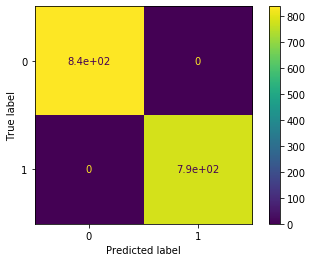

In [58]:
# answer below:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

plot_confusion_matrix(rfc, X_test, y_test)

print('I feel like I had to have done something wrong... because wut? This is telling me that I had no false positives or false negatives')

Print the feature importances ordered by importance. Explain your results:

In [59]:
# answer below:

feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

odor_n                        0.144506
gill-size_n                   0.092295
odor_f                        0.089013
stalk-surface-above-ring_k    0.052466
spore-print-color_h           0.042085
                                ...   
cap-shape_c                   0.000105
spore-print-color_o           0.000073
gill-color_y                  0.000043
stalk-color-above-ring_e      0.000026
gill-color_o                  0.000000
Length: 95, dtype: float64

In [60]:
print('The odor_n feature is the most important while the cap-color_u is the least important')

The odor_n feature is the most important while the cap-color_u is the least important
